# Submarine: Entropy Reduction Visualization

This notebook simulates the entropy reduction in the Submarine scenario, interpreted as a search game similar to Battleship, where a submarine is hidden in one cell of a 10x10 grid (100 cells). Iterative yes/no queries reduce the possible locations, decreasing entropy. We model this as a computational process akin to Lambda Calculus state reduction and visualize the entropy decrease over steps.

## Problem Setup
- **Grid**: 10x10 grid, 100 possible cells for the submarine's location.
- **Queries**: Yes/No questions (e.g., 'Is it in the left half?'), each providing approximately 1 bit of information by halving the possibilities.
- **Goal**: Reduce entropy from log₂(100) ≈ 6.644 bits to 0 in about 7 steps.
- **Lambda Calculus Model**: State as a list of possible cell coordinates, queries as functions filtering the state, entropy as log₂ of remaining cells.

We use Python to simulate this reduction process and plot the entropy over steps.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

# Initialize the state with 100 possible cells (10x10 grid)
def initialize_state() -> List[Tuple[int, int]]:
    return [(x, y) for x in range(1, 11) for y in range(1, 11)]

# Calculate entropy of the current state (log2 of number of cells)
def calculate_entropy(state: List[Tuple[int, int]]) -> float:
    if len(state) == 0:
        return 0.0
    return math.log2(len(state))

# Simulate a yes/no query that halves the state (e.g., by row or column)
def query(state: List[Tuple[int, int]], dimension: str, condition: str) -> List[Tuple[int, int]]:
    if not state:
        return state
    if dimension == 'column':
        mid = 5  # Split at column 5
        if condition == 'left':
            return [(x, y) for x, y in state if x <= mid]
        else:  # 'right'
            return [(x, y) for x, y in state if x > mid]
    else:  # 'row'
        mid = 5  # Split at row 5
        if condition == 'top':
            return [(x, y) for x, y in state if y <= mid]
        else:  # 'bottom'
            return [(x, y) for x, y in state if y > mid]

# Display state and entropy at each step
def display_state(state: List[Tuple[int, int]], step: int):
    print(f'Step {step}:')
    print(f'  Number of possible cells: {len(state)}')
    print(f'  Entropy: {calculate_entropy(state):.3f} bits')
    if len(state) <= 5:  # Show details only for small states
        print(f'  Possible cells: {state}')
    print()

## Simulation of Submarine Search Strategy

We'll simulate a strategy for the Submarine game where each yes/no question aims to halve the remaining grid cells:
- Start with 100 cells (entropy ≈ 6.644 bits).
- Each query splits the grid by row or column, choosing halves based on the answer.
- For demonstration, we'll alternate between column and row splits with answers that reduce the state over 7 steps.

This simulates a binary search-like process on a grid, reducing the state space with each step.

In [2]:
# Initialize state
state = initialize_state()
display_state(state, 0)

# Store entropy values for plotting
entropies = [calculate_entropy(state)]
states = [state]

# Simulate 7 queries alternating between column and row splits
queries = [('column', 'left'), ('row', 'top'), ('column', 'right'), ('row', 'bottom'), ('column', 'left'), ('row', 'top'), ('column', 'right')]
for step, (dim, cond) in enumerate(queries, 1):
    state = query(state, dim, cond)
    states.append(state)
    entropies.append(calculate_entropy(state))
    display_state(state, step)
    if len(state) <= 1:
        break

Step 0:
  Number of possible cells: 100
  Entropy: 6.644 bits

Step 1:
  Number of possible cells: 50
  Entropy: 5.644 bits

Step 2:
  Number of possible cells: 25
  Entropy: 4.644 bits

Step 3:
  Number of possible cells: 0
  Entropy: 0.000 bits
  Possible cells: []



## Visualization of Entropy Reduction

To visually represent the entropy reduction over the queries, we create a polar plot where:
- The angle (theta) represents the number of queries (0 to 7), scaled to radians (0 to 3π/2).
- The radius (r) represents the entropy $H(state_i) = \log_2(|state_i|)$, decreasing as cells are reduced.

This plot illustrates how each query step reduces uncertainty, aligning with the computational model of state reduction.

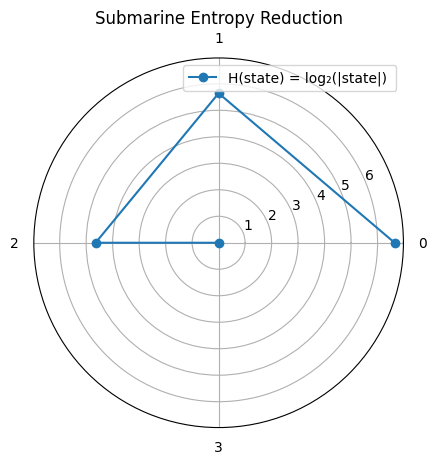

<Figure size 640x480 with 0 Axes>

In [3]:
# Define theta as number of queries (0 to len(entropies)-1)
steps = np.array(range(len(entropies)))
theta = steps * (np.pi / 2) * (3 / max(steps) if max(steps) > 0 else 1)  # Scale to radians

# Define r as entropy values
r = entropies

# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r, 'o-', label='H(state) = log₂(|state|) ')
ax.set_title('Submarine Entropy Reduction')
ax.set_xticks(theta)
ax.set_xticklabels([str(i) for i in steps])  # Label as query steps
ax.legend()

# Display the plot
plt.show()

# Save the plot
plt.savefig('../images/graphs/submarine_polar_plot.png')